<h1>Public Health Data - Chicago</h1>
<p> Data Source Found <a href = https://data.cityofchicago.org/Health-Human-Services/Public-Health-Statistics-Selected-public-health-in/iqnk-2tcu>here</a> </p>

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data from csv and examine the data set.

This is public health data by neighborhood for Chicago wards, downloaded from the Chicago Data Portal. The health data was aggregated from census tract-level counts and estimates from the 2000 census, 2010 census, and 2006-2010 American Community Survey. 

In [2]:
phd = pd.read_csv('Public_Health_Statistics-_Selected_public_health_indicators_by_Chicago_community_area.csv')
phd.head()

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [3]:
phd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Community Area                              77 non-null     int64  
 1   Community Area Name                         77 non-null     object 
 2   Birth Rate                                  77 non-null     float64
 3   General Fertility Rate                      77 non-null     float64
 4   Low Birth Weight                            77 non-null     float64
 5   Prenatal Care Beginning in First Trimester  77 non-null     float64
 6   Preterm Births                              77 non-null     float64
 7   Teen Birth Rate                             77 non-null     float64
 8   Assault (Homicide)                          77 non-null     float64
 9   Breast cancer in females                    77 non-null     float64
 10  Cancer (All Site

In [5]:
#We can see that the Gonorrhea in males column is an object when it should be a feature. 
#Inspect the values
phd['Gonorrhea in Males'].unique()

array(['423.3', '205.7', '468.7', '195.5', '188.6', '357.6', '93.1',
       '235.8', '.', '101.8', '84.9', '74.5', '70.1', '140.9', '114.3',
       '92.2', '159.3', '937.5', '182.8', '1678.9', '2336.7', '1730.2',
       '466.5', '2236.3', '106.8', '78.7', '200.5', '318.7', '218',
       '727.4', '1629.3', '1556.4', '1680', '549.1', '2058', '168.4',
       '1818.6', '1357.1', '1855.8', '2059.9', '893.5', '1574.8',
       '1106.5', '1725.3', '1480.4', '1018.2', '98.6', '1673.4', '1397.9',
       '52.7', '65', '579.7', '115.9', '149.2', '87.2', '1159.9',
       '2545.7', '2323.5', '2034.2', '602.9', '1986.7', '469.5', '1274.2',
       '741.1', '427.5'], dtype=object)

In [6]:
#some are input as '.''
phd.loc[phd['Gonorrhea in Males'] == '.', 'Gonorrhea in Males'] = np.nan
phd['Gonorrhea in Males'] = phd['Gonorrhea in Males'].astype('float')

In [5]:
phd['Gonorrhea in Males'] = phd['Gonorrhea in Males'].astype('float')

In [7]:
phd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Community Area                              77 non-null     int64  
 1   Community Area Name                         77 non-null     object 
 2   Birth Rate                                  77 non-null     float64
 3   General Fertility Rate                      77 non-null     float64
 4   Low Birth Weight                            77 non-null     float64
 5   Prenatal Care Beginning in First Trimester  77 non-null     float64
 6   Preterm Births                              77 non-null     float64
 7   Teen Birth Rate                             77 non-null     float64
 8   Assault (Homicide)                          77 non-null     float64
 9   Breast cancer in females                    77 non-null     float64
 10  Cancer (All Site

I would like to investigate the relationship between health indicators and economic indicators in the city. Does economic status influence health outcomes for Chicago residents?

In [8]:
#Select health and economic indicators of interest
health_cols = ['Cancer (All Sites)', 'Diabetes-related', 'Firearm-related', 'Lung Cancer', 'Stroke (Cerebrovascular Disease)',
        'Childhood Blood Lead Level Screening', 'Childhood Lead Poisoning']
econ_cols = ['Below Poverty Level', 'Crowded Housing', 'Dependency', 'No High School Diploma', 'Per Capita Income', 'Unemployment']

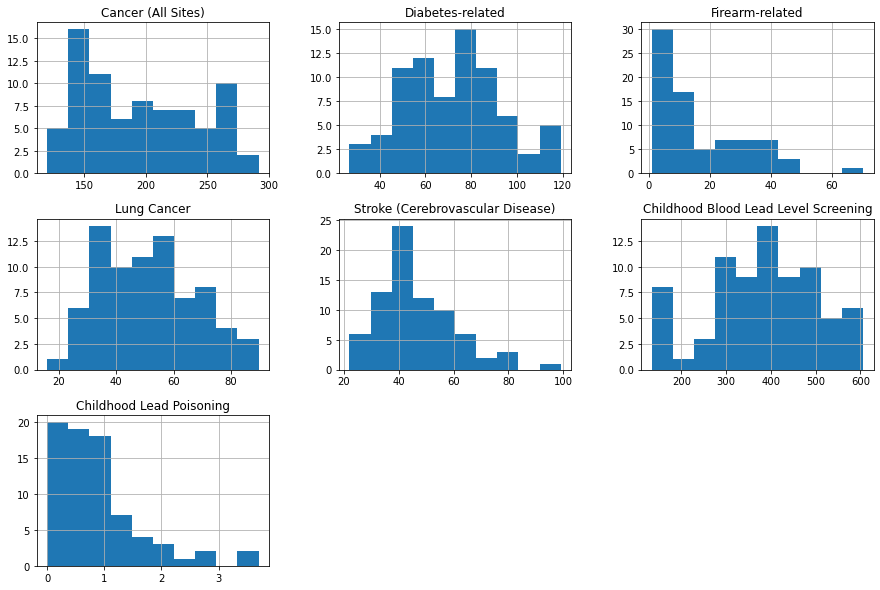

In [9]:
#visualize distribution of selected health indicators
phd[health_cols].hist(figsize=(15,10))
plt.show()

We can see that some outcomes are somewhat normally distributed, such as lung cancer and diabetes. Others are obviously skewed, especially childhood lead poisoning and firearm-related deaths.

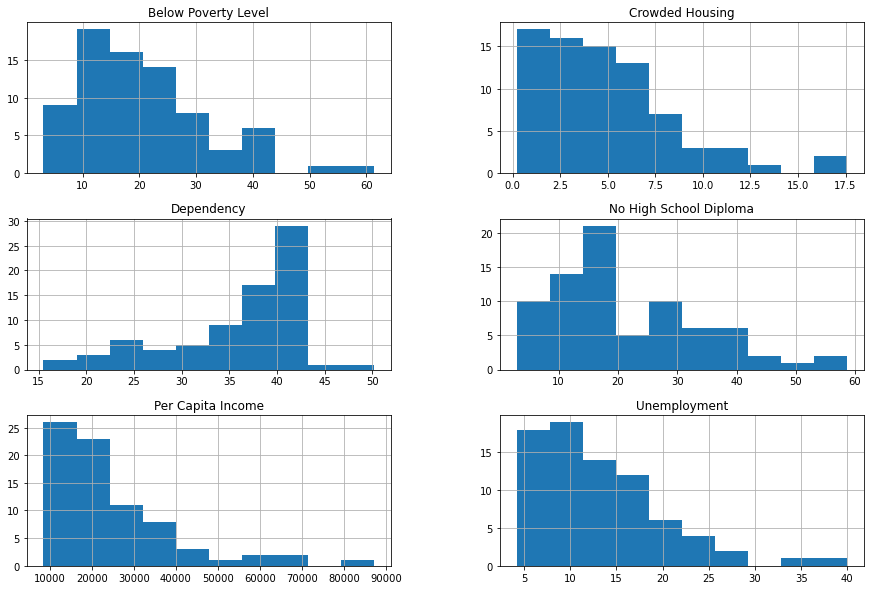

In [10]:
phd[econ_cols].hist(figsize=(15,10))
plt.show()

By contrast with the health indicators the economic indicators are more obviously skewed, reflecting the general structure of wealth distribution in the United States. There are several neighborhoods with very high unemployment, high crowded housing, and a large portion of the population below the poverty level. We can look at how these indicators influence health outcomes with scatter plots.

In [11]:
def one_x_scatter(df, xcol, ycols):
    """Plots all columns in a list of y-columns against one x-column."""
    mod = 0
    if len(ycols) % 3 != 0:
        mod = 1
    nrows = int(len(ycols) / 3) + mod
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15,nrows*4))
    for ax, col in zip(axes.flat, ycols):
        ax.scatter(x=df[xcol], y=df[col])
        ax.set_ylabel(col)
        ax.set_xlabel(xcol)
    plt.show()

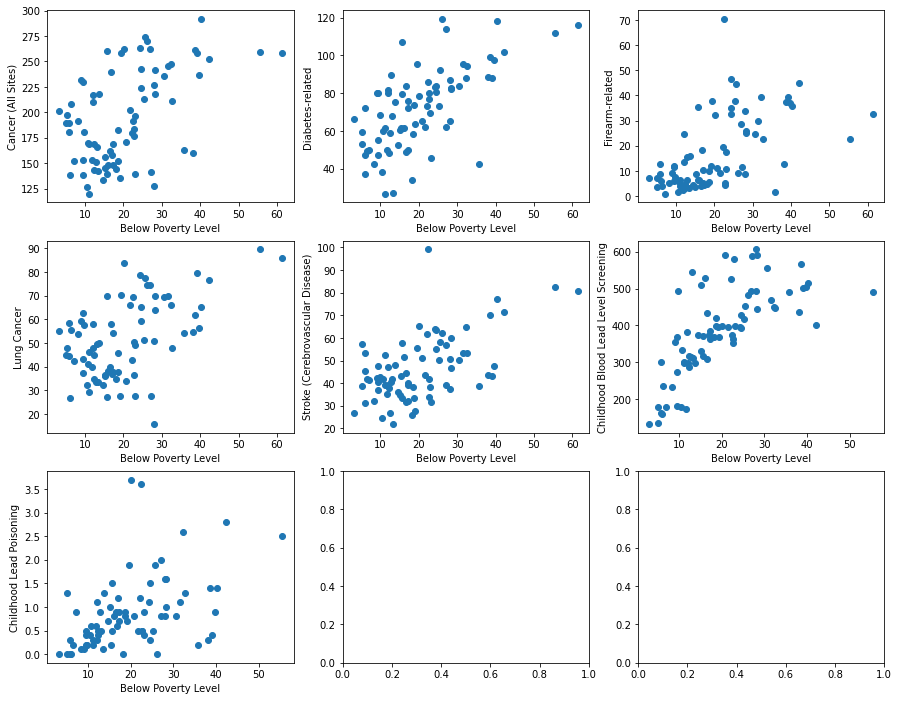

In [12]:
one_x_scatter(phd, 'Below Poverty Level', health_cols)

The percent below the poverty level correlates positively with all negative health outcomes, especially childhood blood lead level screening, diabetes, and cancer. This is sadly as we would expect. There is a long history in Chicago of environmental hazards and polluting industries being placed in poor neighborhoods. There are many references to explore on this topic, you can find a few recent pieces <a href='https://www.wbez.org/stories/how-environmental-racism-hurts-chicagos-marginalized-communities/86c8165c-5213-4dac-912b-71bda3a35e69'>here</a> and <a href='https://www.wbez.org/stories/study-sheds-new-light-on-environmental-racism/e59c3bca-911c-42e8-9ae2-73edde72e75c'>here</a>. These living conditions are known to cause cancer and high blood lead levels. Additionally the stress, poor nutrition, and poor access to healthcare that can accompany poverty increase the likelihood of diabetes. 

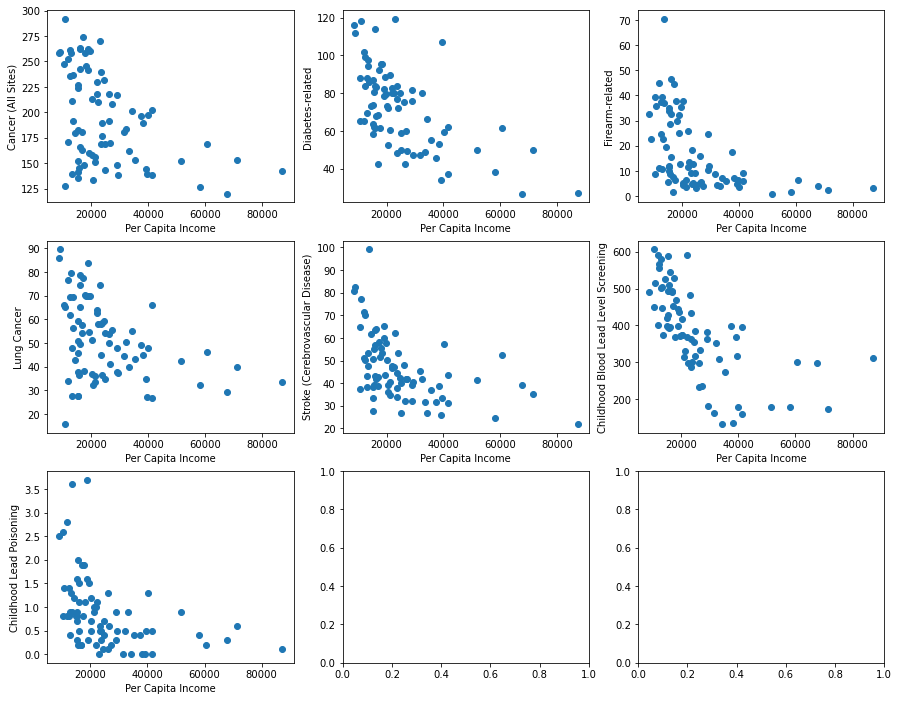

In [13]:
one_x_scatter(phd, 'Per Capita Income', health_cols)

Again we see that per capita income in general is quite negatively correlated with negative public health outcomes, especially cancer and firearm-related deaths. 

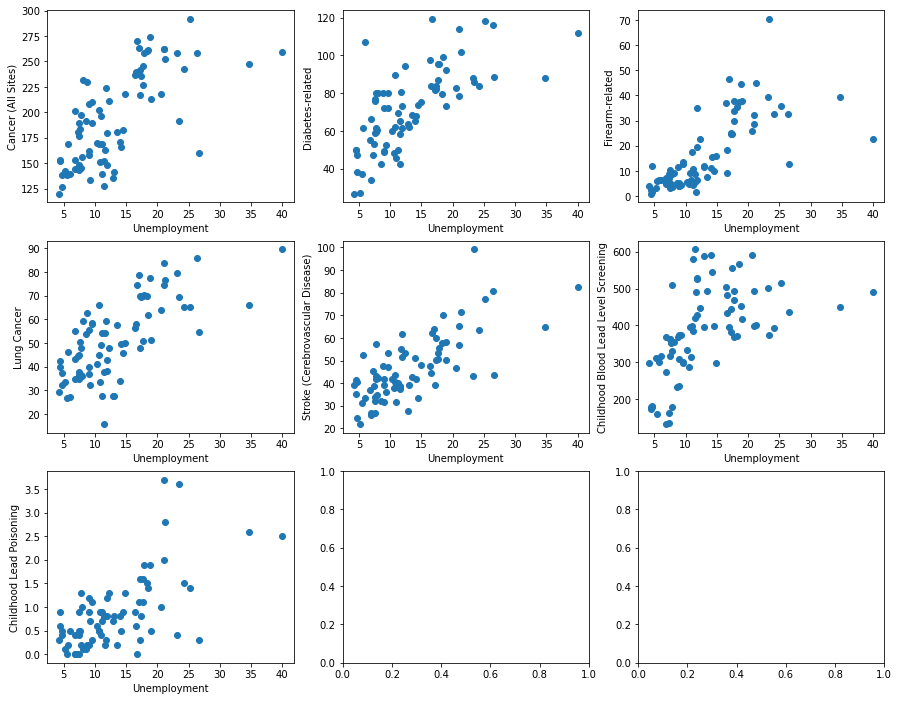

In [14]:
one_x_scatter(phd, 'Unemployment', health_cols)

Unemployment shows similar results to the "below poverty level" charts.

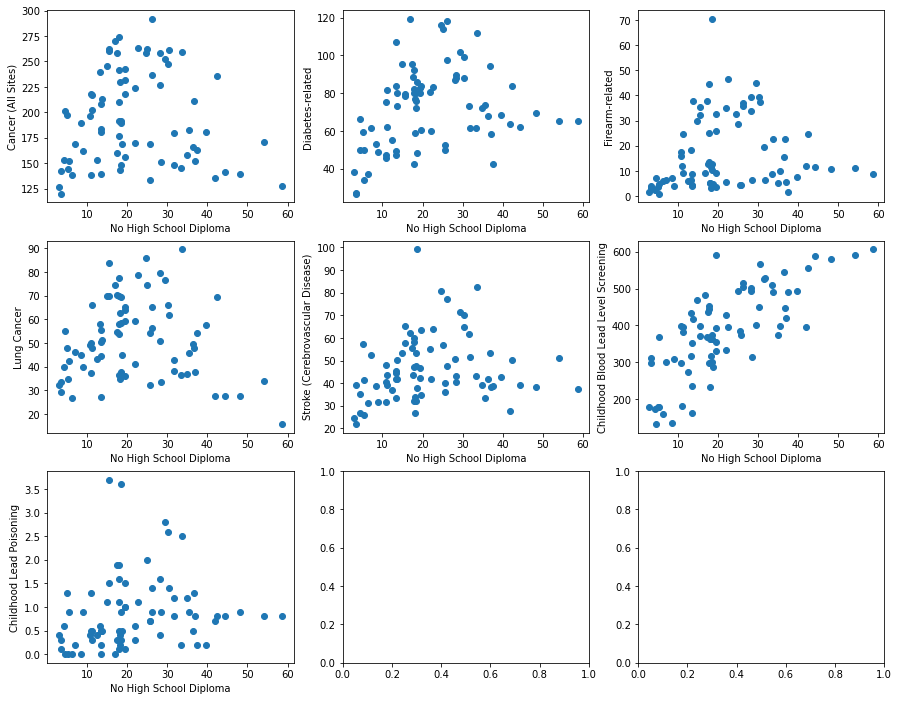

In [15]:
one_x_scatter(phd, 'No High School Diploma', health_cols)

High school diploma has similar but less pronounced trends compared to other economic indicators, with the exception of childhood blood lead level screening.

Overall the correlations are clear and an indictment of the U.S. health care, economic, and environmental systems. In Chicago your income and the wealth of the neighborhood you live in is frequently a life or death matter. 

## Geospatial Trends

We can use mapping to look at the geographic patters in the data as well. Historically Chicago's central and Northeastern neighborhoods are wealthier and predominantly white. The Southern and Western neighborhoods are predominantly Black or Latinx. 

In [16]:
numbers = ['8','32','33','5','6','7','21','22','1','2','3','4','9','10','11','12','13','14','76','77','15','16','17','18','19','20','23','24','25','26','27','28','29','30','31','34','35','36','37','38','39','40','41','42','43','60','69','56','57','58','59','61','62','63','64','65','66','67','68','44','45','46','47','48','49','50','51','52','53','54','55','70','71','72','73','74','75']
names = ['Near North Side','The Loop','Near South Side','North Center','Lake View','Lincoln Park','Avondale','Logan Square','Rogers Park','West Ridge','Uptown','Lincoln Square','Edison Park','Norwood Park','Jefferson Park','Forest Glen','North Park','Albany Park','O\'Hare','Edgewater','Portage Park','Irving Park','Dunning','Montclare','Belmont Cragin','Hermosa','Humboldt Park','West Town','Austin','West Garfield Park','East Garfield Park','Near West Side','North Lawndale','South Lawndale','Lower West Side','Armour Square','Douglas','Oakland','Fuller Park','Grand Boulevard','Kenwood','Washington Park','Hyde Park','Woodlawn','South Shore','Bridgeport','Greater Grand Crossing','Garfield Ridge','Archer Heights','Brighton Park','McKinley Park','New City','West Elsdon','Gage Park','Clearing','West Lawn','Chicago Lawn','West Englewood','Englewood','Chatham','Avalon Park','South Chicago','Burnside','Calumet Heights','Roseland','Pullman','South Deering','East Side','West Pullman','Riverdale','Hegewisch','Ashburn','Auburn Gresham','Beverly','Washington Heights','Mount Greenwood','Morgan Park']
regions = ['Central','Central','Central','North Side','North Side','North Side','North Side','North Side','Far North Side','Far North Side','Far North Side','Far North Side','Far North Side','Far North Side','Far North Side','Far North Side','Far North Side','Far North Side','Far North Side','Far North Side','Northwest Side','Northwest Side','Northwest Side','Northwest Side','Northwest Side','Northwest Side','West Side','West Side','West Side','West Side','West Side','West Side','West Side','West Side','West Side','South Side','South Side','South Side','South Side','South Side','South Side','South Side','South Side','South Side','South Side','South Side','South Side','Southwest Side','Southwest Side','Southwest Side','Southwest Side','Southwest Side','Southwest Side','Southwest Side','Southwest Side','Southwest Side','Southwest Side','Southwest Side','Southwest Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southeast Side','Far Southwest Side','Far Southwest Side','Far Southwest Side','Far Southwest Side','Far Southwest Side','Far Southwest Side']

In [17]:
region_df = pd.DataFrame({'Community Area': numbers, 'Region': regions})
region_df['Community Area'] = region_df['Community Area'].astype(int)
region_df.head()

,Community Area,Region
0,8,Central
1,32,Central
2,33,Central
3,5,North Side
4,6,North Side


In [18]:
df = pd.merge(phd, region_df, on = "Community Area")
df.head()

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment,Region
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5,Far North Side
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9,Far North Side
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7,Far North Side
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8,Far North Side
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5,North Side


In [19]:
phd_regional_means = df.groupby(['Region']).mean()
phd_regional_means.head()

,Community Area,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,Cancer (All Sites),...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
Region,,,,,,,,,,,,,,,,,,,,,
Central,24.333333,13.833333,45.500000,7.566667,75.333333,9.133333,28.733333,3.066667,25.366667,143.933333,...,0.200000,224.966667,251.666667,5.666667,11.866667,1.800000,19.933333,4.633333,71818.333333,5.033333
Far North Side,19.333333,13.875000,62.758333,7.641667,79.250000,9.108333,22.700000,4.650000,20.558333,165.750000,...,0.466667,154.350000,303.750000,8.133333,12.425000,4.125000,32.400000,14.891667,29982.833333,7.441667
Far Southeast Side,49.500000,14.358333,69.400000,12.325000,73.208333,14.208333,63.516667,33.575000,27.725000,229.000000,...,1.418182,1445.781818,1353.118182,5.175000,23.758333,3.966667,42.375000,20.041667,18091.583333,17.666667
Far Southwest Side,72.500000,13.083333,64.616667,10.683333,80.566667,13.116667,42.116667,18.933333,39.333333,224.966667,...,0.966667,971.080000,1014.880000,2.883333,11.950000,2.000000,39.383333,12.316667,26387.000000,13.483333
North Side,12.200000,17.160000,58.960000,7.300000,77.560000,8.520000,31.160000,3.280000,17.240000,142.900000,...,0.700000,102.360000,178.160000,4.960000,12.240000,2.200000,23.900000,11.360000,46152.000000,6.100000


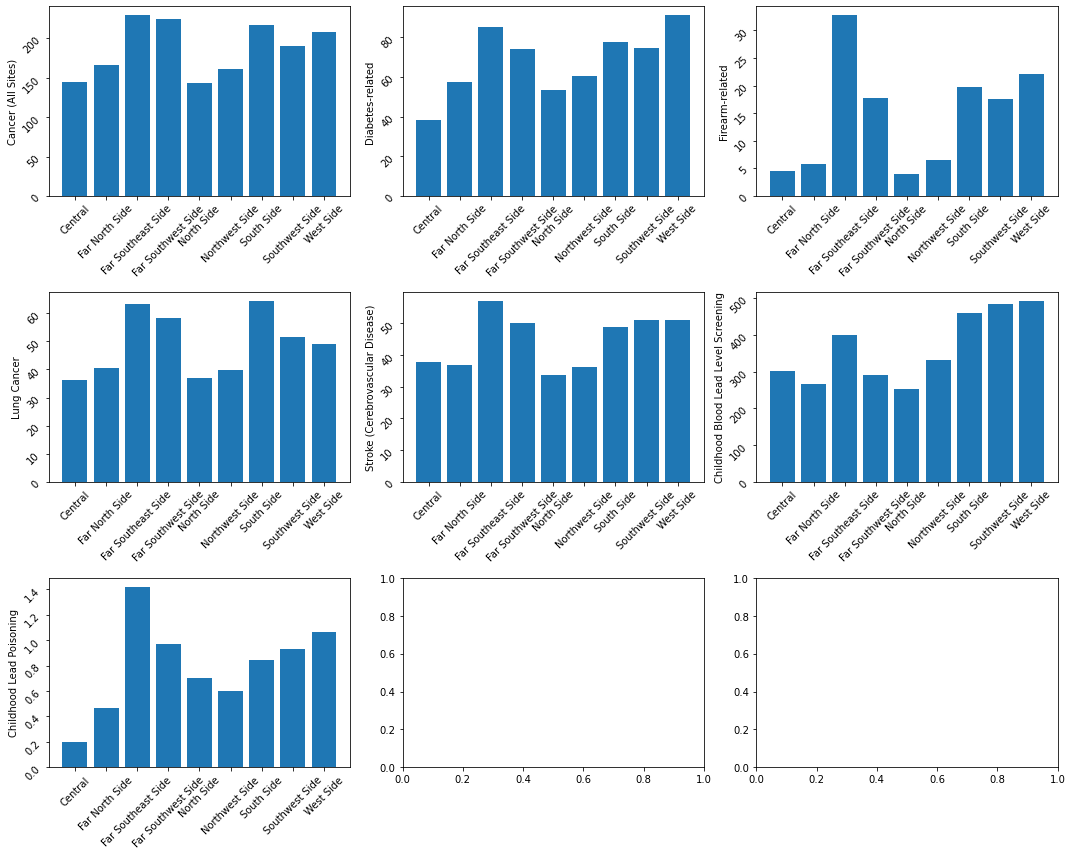

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
for ax, col in zip(axes.flat, health_cols):
    ax.bar(x=phd_regional_means.index, height=phd_regional_means[col])
    ax.tick_params(labelrotation=45)
    ax.set_ylabel(col)
fig.tight_layout()

The bar graphs by region show that there are regional differences but this is a little difficult to look at. Let's map them instead.

In [22]:
fp = 'Chicago_Map/boundaries_community_areas_current/geo_export_14d6861a-130a-4bb9-bb4f-8139346c12af.shp'
map_df = gpd.read_file(fp)

map_df.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [24]:
map_df.area_num_1 = map_df.area_num_1.astype(int)

In [25]:
merged = map_df.set_index('area_num_1').join(df.set_index('Community Area'))

In [26]:
merged.head()

,area,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,Community Area Name,...,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment,Region
area_num_1,,,,,,,,,,,,,,,,,,,,,
35,0.0,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",Douglas,...,1063.3,727.4,4.2,26.1,1.6,31.0,16.9,23098,16.7,South Side
36,0.0,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",Oakland,...,1655.4,1629.3,6.7,38.1,3.5,40.5,17.6,19312,26.6,South Side
37,0.0,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",Fuller Park,...,1061.9,1556.4,0.0,55.5,4.5,38.2,33.7,9016,40.0,South Side
38,0.0,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",Grand Boulevard,...,1454.6,1680.0,13.2,28.3,2.7,41.7,19.4,22056,20.6,South Side
39,0.0,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",Kenwood,...,610.2,549.1,0.0,23.1,2.3,34.2,10.8,37519,11.0,South Side


In [27]:
type(merged)

geopandas.geodataframe.GeoDataFrame

In [28]:
def map_col(col):
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))
    # create map
    merged.plot(column=col, cmap='Greens', legend=True, linewidth=0.8, ax=ax, edgecolor='0.8')
    # remove the axis
    ax.axis('off')
    # add a title
    ax.set_title(col, fontdict={'fontsize': '14', 'fontweight' : '3'})
    plt.show()

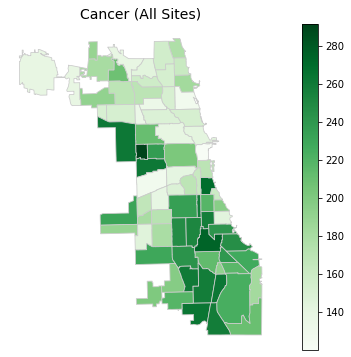

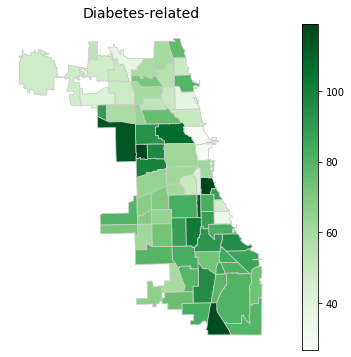

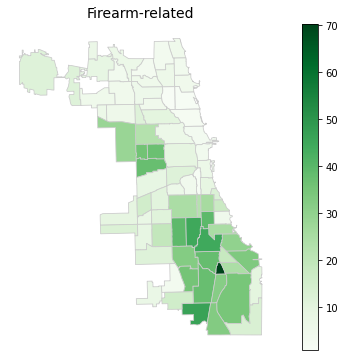

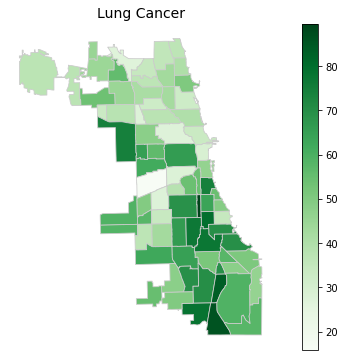

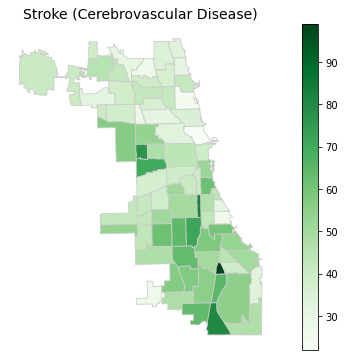

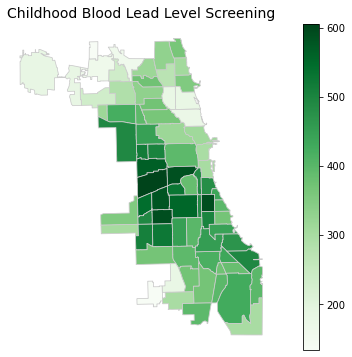

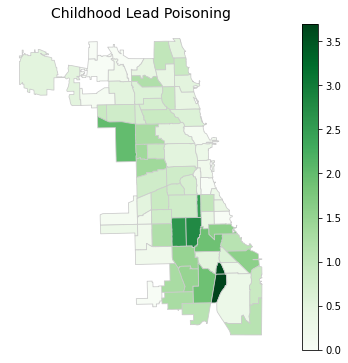

In [29]:
for col in health_cols:
    map_col(col)

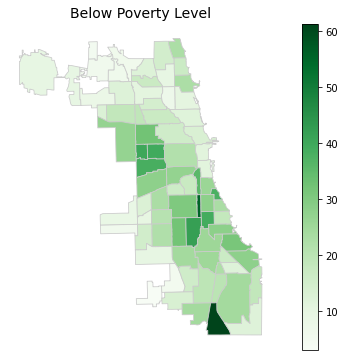

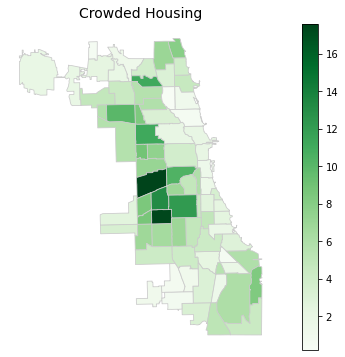

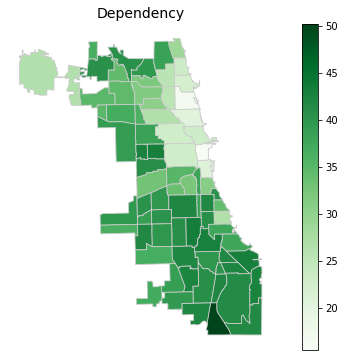

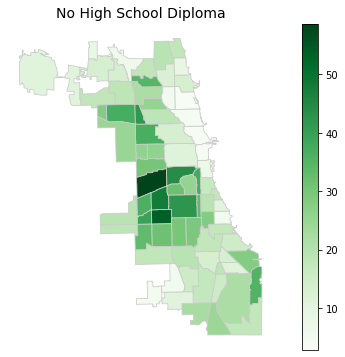

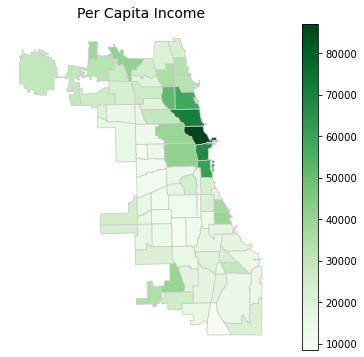

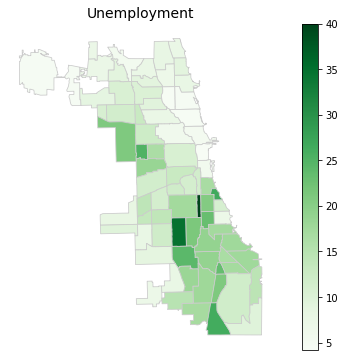

In [30]:
for col in econ_cols:
    map_col(col)

The trends in mapping are much as we would expect. Poor outcomes tend to be concentrated on the South and West sides of the city. This is historically where many polluting industries were located, such as the <a href='https://www.chicagotribune.com/business/ct-xpm-2012-08-30-chi-closure-of-chicagos-crawford-fisk-electric-plants-ends-coal-era-20120830-story.html'>Crawford and Fisk power plants</a>, which were finally shut down in 2012 after a long battle by local activists. Unfortunately even in victory cases like this many of the heavy metals emitted by these and other defunct industrial plants are still present in the soil in these parts of the city. Even now General Iron, a scrap metal business currently located in the wealthy, white neighborhood of Lincoln Park, is looking to relocate to the Southeast side after Lincoln Park residents called for it to move, <a href='https://abc7chicago.com/general-iron-chicago-hud-investigation-lightfoot-zoning/7907300/'>despite outcries from residents in the Southeast</a>. This is all occurring amidst the backdrop of Southside hospital closures, despite the ongoing pandemic and the fact that these neighborhoods are already <a href='https://www.theguardian.com/us-news/2020/dec/13/chicago-mercy-hospital-closure-covid-19'>'medical deserts'</a>.  

Further visualizations or investigations would include:
* explicit use of demographic data, especially race
* access to health care (physical presence of buildings, and / or insurance coverage data)
* data on major nearby polluters
* air quality data
* lead pipe data